### <font color='blue'>Contexto</font>

Uma empresa de supermercados registrou os dados das suas vendas em 3 filiais de diferentes cidades por 3 meses, com vista a  monitorar o facturamento de suas vendas e identificar os fatores que tem contribuído para o aumento ou diminuição do facturamento e quantidade dos produtos vendidos.

### <font color='blue'>Objectivo da Analise</font>

O objetivo desta análise é de realizar uma analise exploratória profunda com vista a extrair insights que ajudaram a compreender, como as variáveis: marca, cidade, tipo de consumidor, género, metodo de pagamento, avaliação e data, hora tem influenciado no aumento ou diminuição das vendas dos produtos.

### <font color='blue'>Descrição das Variaveis Usadas na Analise</font>

* **Branch** - Corresponde a marca do produto vendido.

* **City** - Corresponde a cidade onde se encontra o produto vendido.

* **Customer type**- Corresponde ao tipo de cliente que pode ser membro ou normal.

* **Gender**- Corresponde ao género do cliente.

* **Product line**- Corresponde a categoria do produto vendido.

* **Unit price**- Corresponde ao preço unitário do produto.

* **Quantity**- Corresponde a quantidade dos produtos vendidos.

* **Total**- Corresponde ao preço total dos produtos vendidos.

* **Date**- Corresponde a data que o produto foi vendido.

* **Time**- Corresponde a hora que o produto foi vendido.

* **Payment**- Corresponde ao método de pagamento usado pelo cliente para efetuar o pagamento o produto.

* **Rating**- Corresponde a avaliação do cliente sobre o produto.




### <font color='blue'> Importando as bibliotecas que serão usadas na analise </font>

In [1]:
import numpy as np
import pandas as pd
#vislualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as mno
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

Parâmetros globais de configuração dos gráficos, para criar tdos os graficos com as mesmas dimencoes

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Caregando o dataset

In [3]:
df=pd.read_csv('supermarket_sales.csv')

In [4]:
df.shape

(1000, 17)

In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## <font color='blue'> Limpeza de Dados </font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Tratamento de Valores Ausentes

Valor ausente significa ausência de informação e não ausência de dado!

Procurando Missing Values

<AxesSubplot:>

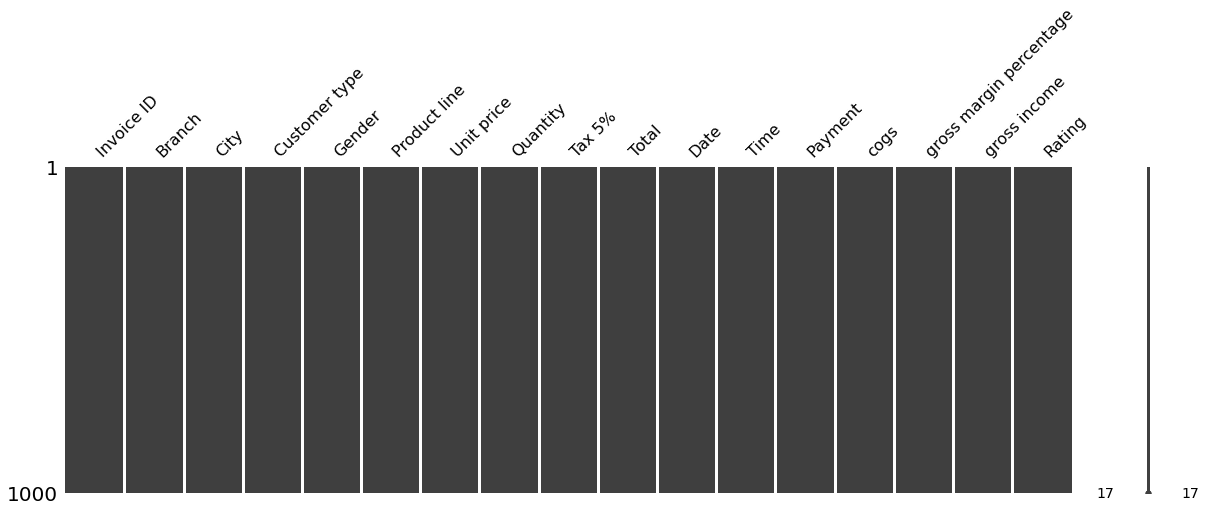

In [7]:
mno.matrix(df, figsize = (20, 6))

### Tratamento de Valores Duplicados

Valores duplicados significam duplicidade dos dados em toda a linha (todo o registro).

In [8]:
df.duplicated().sum()

0

In [9]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## <font color='blue'> PARTE 1 - Separação das Variáveis categóricas e numéricas </font>

In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [11]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
# Lista de colunas categóricas
cats = ['Branch','City','Customer type','Gender','Product line','Payment']

In [13]:
# Lista de colunas numéricas
nums = ['Unit price','Quantity','Tax 5%','Total','cogs','gross income','Rating']

## <font color='blue'> Explorando as Variáveis Numéricas </font>

In [14]:
df[nums].describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


## Análise Univariada - Dist Plots

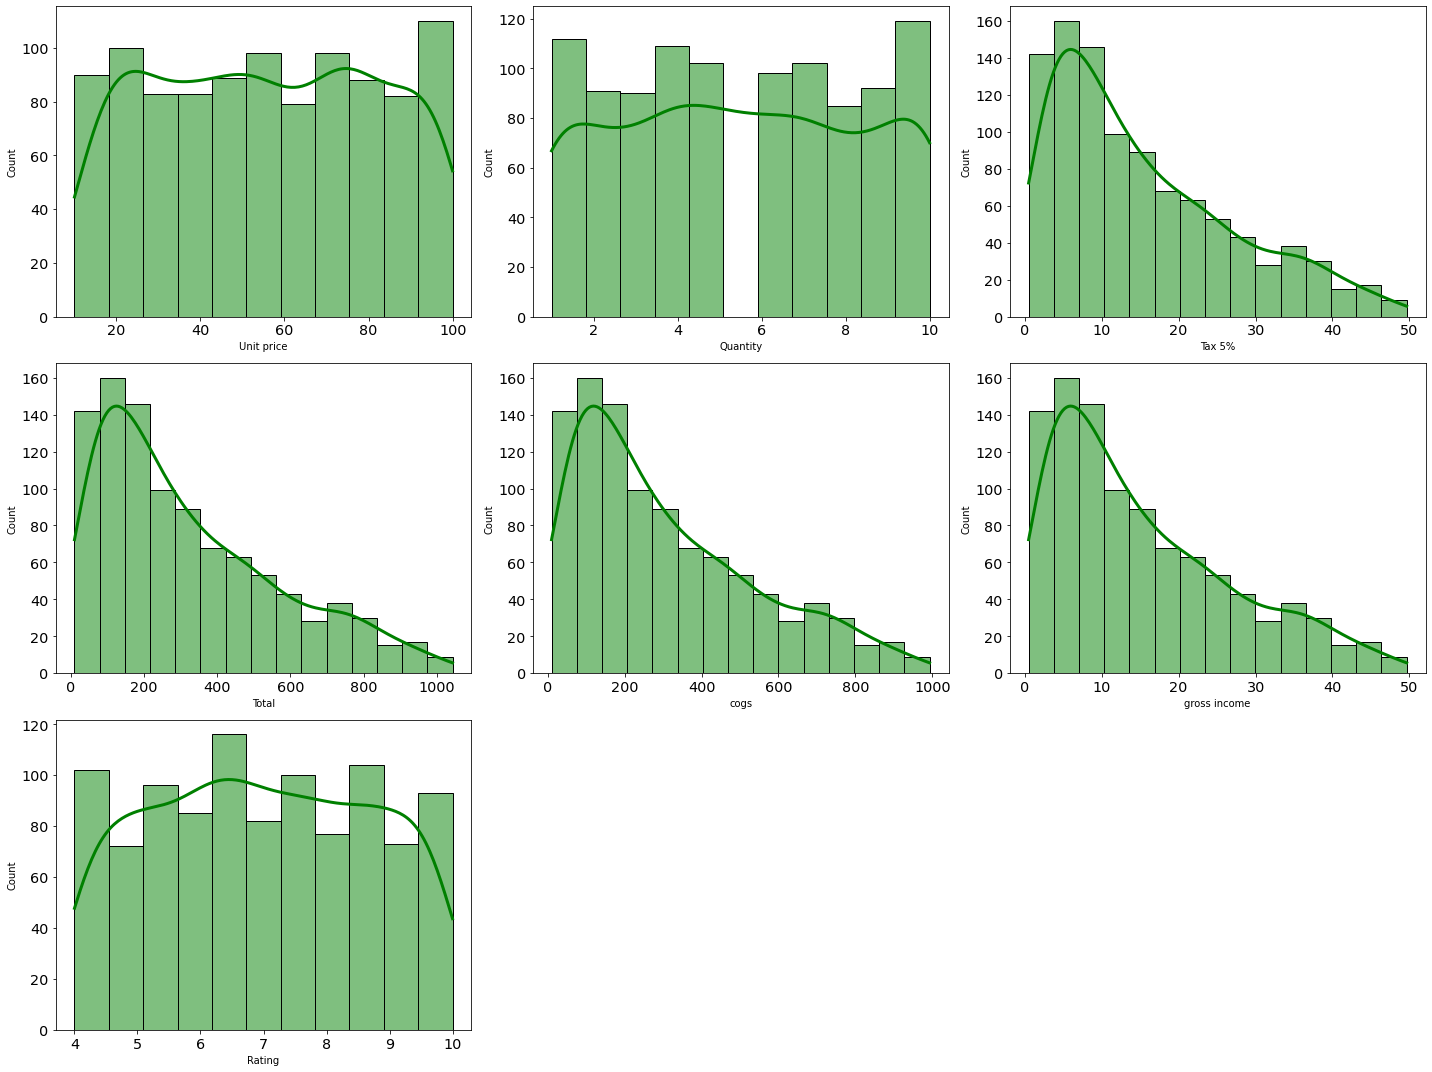

In [15]:
features = nums
plt.figure(figsize = (20, 15))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

## Algumas observações:

1. As colunas `unit price`, `quantity` e `Rating` parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).
3. As colunas `taxa 5%`, `cogs`, `total` e `gross income` parecem  estar mais inclinada para a esquerda (Média menor do que a Mediana).

## Análise Univariada - Box Plots

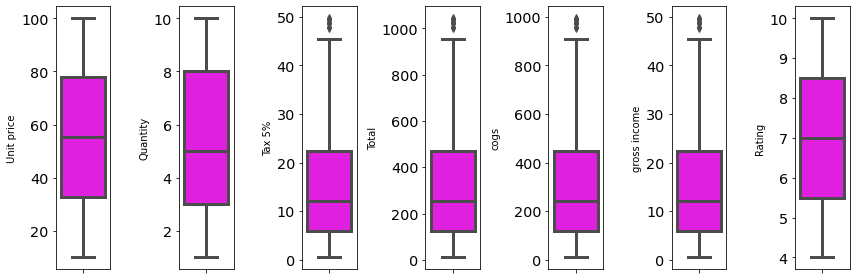

In [16]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

## Algumas observações:

As colunas `taxa 5%`, `cogs`, `total` e `gross income` apresentam outliers(valores que estao muito acima da media), por esta ser 
uma base de dados do tipo e-commerce é normal porque existem clientes que fazem compras com valores altos comparando com os outros.

## Análise Bivariada - Mapa de Correlação

In [17]:
corr_df = df[nums].corr()

<AxesSubplot:>

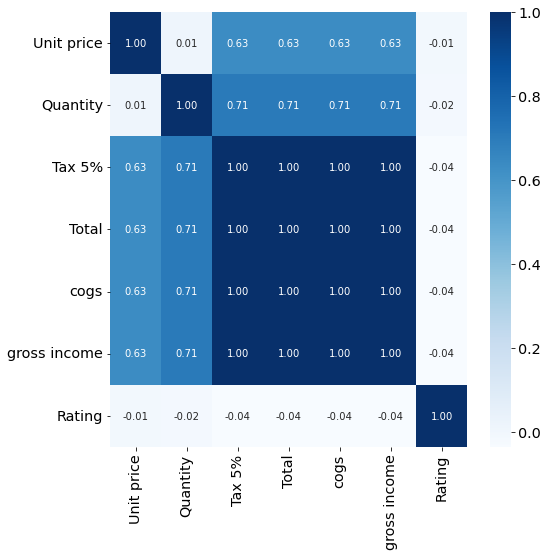

In [18]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

## A partir do *mapa de correlação* acima, pode-se ver que:

* Há uma correlação positiva entre `Quantidade` e `Total`.
* Há uma correlação positiva entre `unit price` e `Total`.
* Há uma correlação extremamente positiva entre as variaves Tax 5%, Total, cogs, Gross income oque representa Multicolinealidade(quando 2 ou mais variaveis trasmitem a mesma informação)

Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

## Explorando as Variáveis Categóricas

In [19]:
df[cats].describe()

,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000
unique,3,3,2,2,6,3
top,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,340,340,501,501,178,345


## Algumas observações:

* Para a variável Branch **A** é a classe dominante.
* Para a variável City **Yangon** é a classe dominante.
* Para a variável Customer type  **Member** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Para a variável Product line, **Fashion Acessories** é a classe dominante.
* Para a variável Payment, **Ewallet** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-6 valores únicos**

## <font color='blue'> Colunas Categóricas x Variável Target(Total vendido) </font>

* Neste ponto, vamos analizar como as variaveis *marca*, *cidade*, *tipo de consumidor*, *genero*, *linha do produto* e *metodo de pagamento* tem influenciado no *valor total obitido nas vendas*.

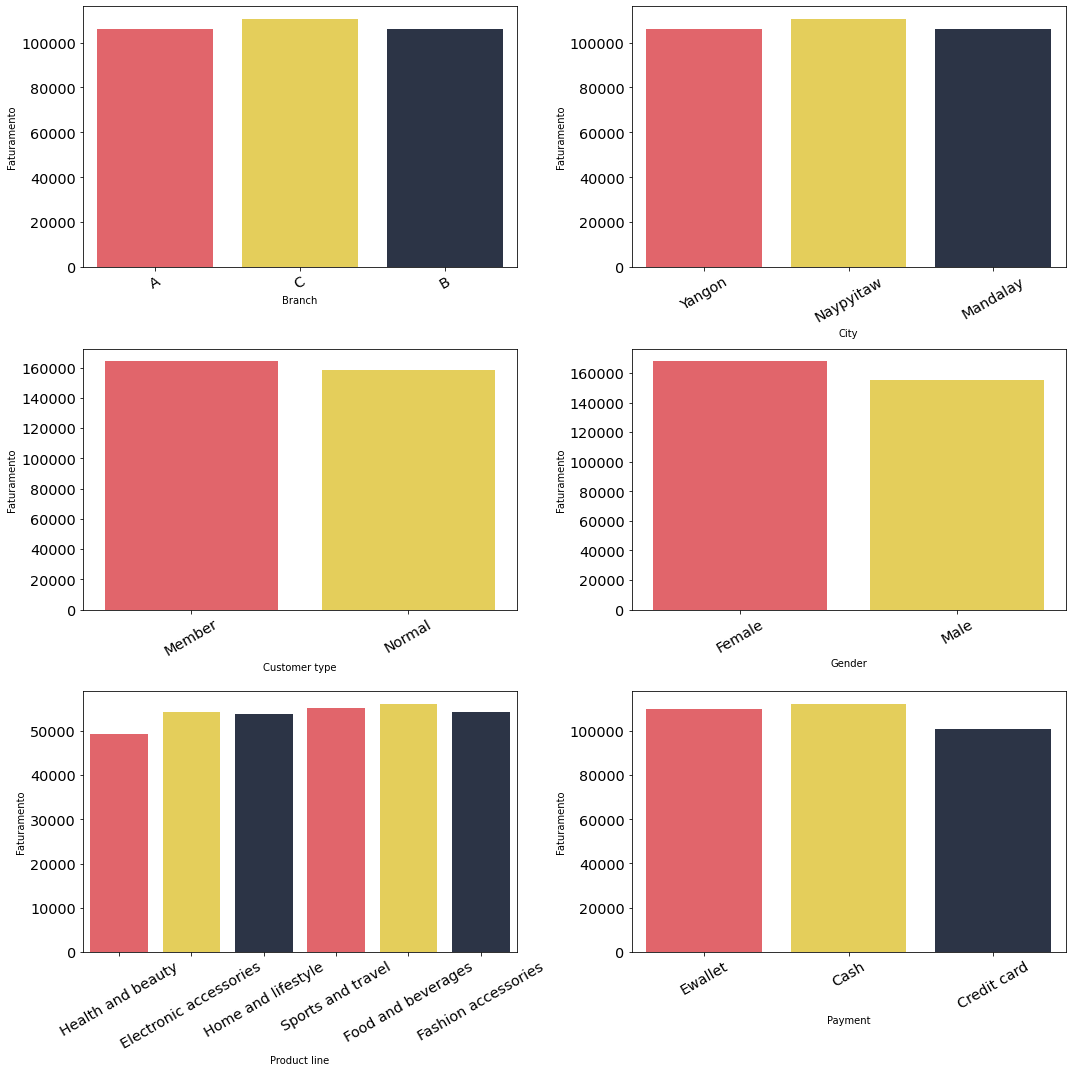

In [20]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Total', data=df, ci=None, estimator=sum, palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.ylabel('Faturamento')
    plt.tight_layout()

## <font color='blue'>  Colunas Categóricas x Variável Target(Quantidade) </font>

* Neste ponto, vamos analizar como as variaveis *marca*, *cidade*, *tipo de consumidor*, *genero*, *linha do produto* e *metodo de pagamento* tem influenciado na  *quantidade de produtos vendidos*.

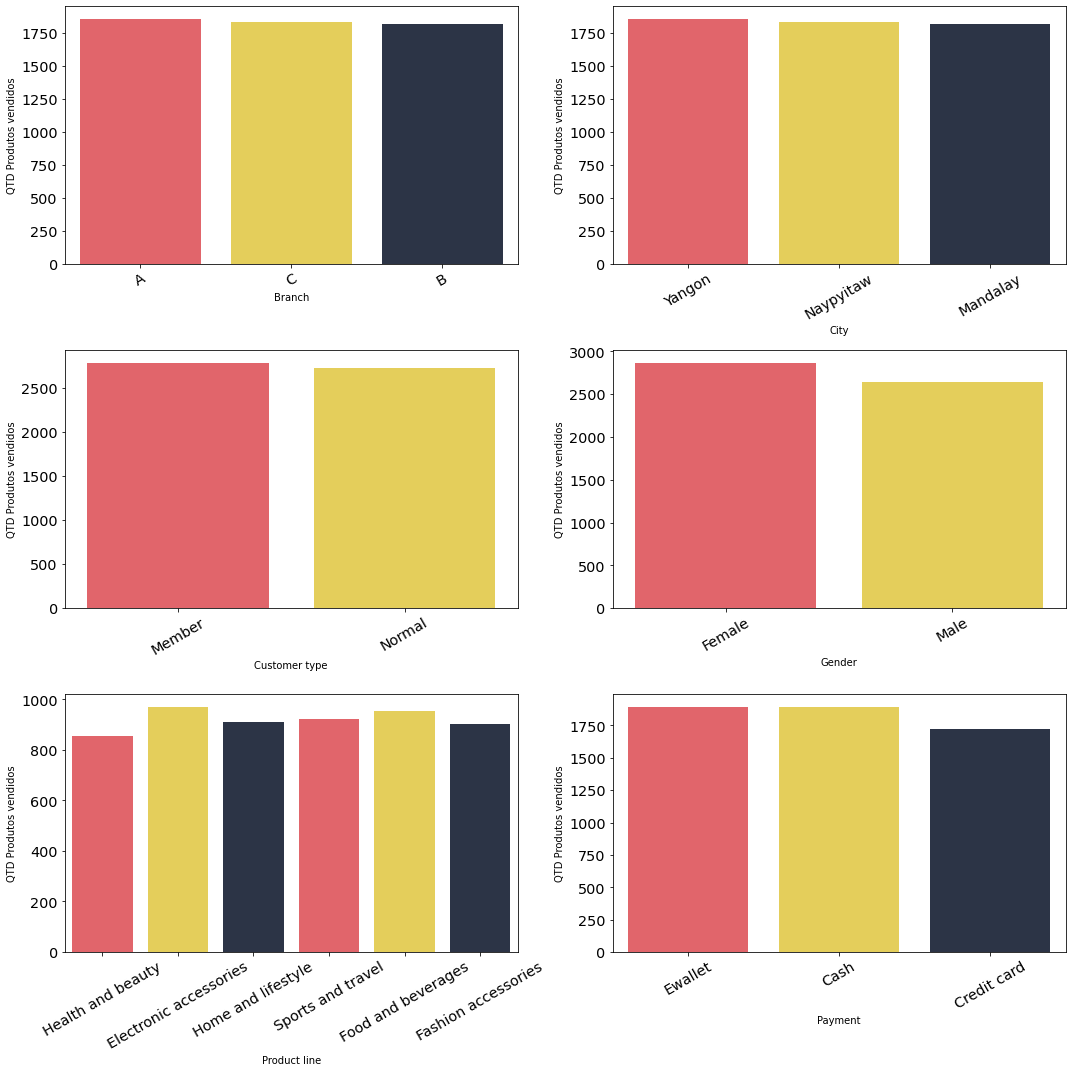

In [21]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Quantity', data=df, ci=None, estimator=sum, palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.ylabel('QTD Produtos vendidos')
    plt.tight_layout()

## <font color='blue'> Variaveis Categóricas x Variável Target(Rating) </font>

* Neste ponto, vamos analizar como as variaveis *marca*, *cidade*, *tipo de consumidor*, *genero*, *linha do produto* e *metodo de pagamento* tem influenciado na  *avaliacao dos clientes*.

In [22]:
df['Avaliacao'] = np.where(
        (df['Rating'] >= 1) & (df['Rating'] < 6 ), "Baixa", 
    np.where(
        (df['Rating'] >= 6) & (df['Rating'] < 8 ),"Media", 
    np.where(
        (df['Rating'] >= 8) &  (df['Rating'] < 11 ), "Alta" , 'x')))

In [23]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Avaliacao
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Alta
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Alta
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Media
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Alta
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Baixa


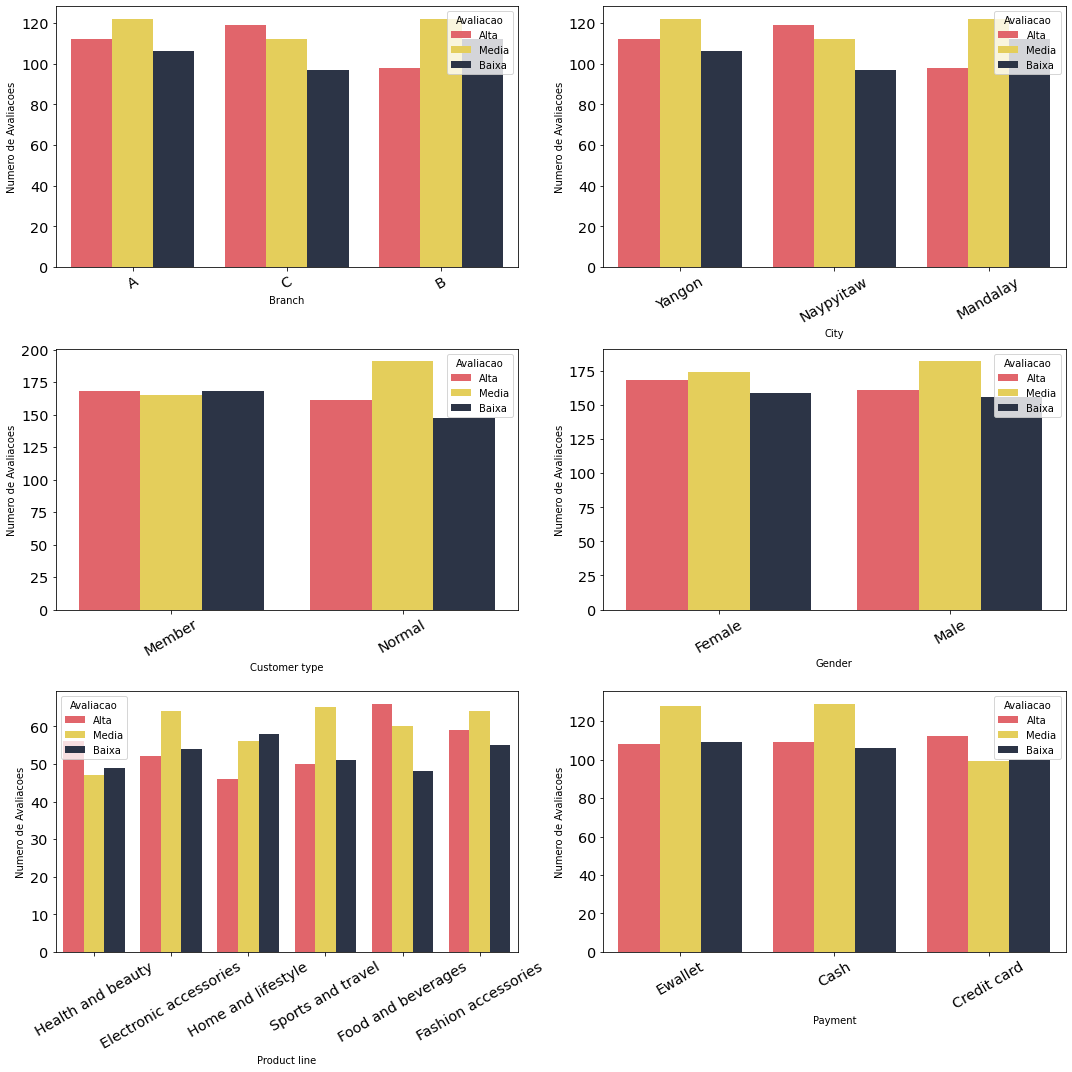

In [24]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.countplot(data = df, x = cats[i], hue = 'Avaliacao', palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.ylabel('Numero de Avaliacoes')
    plt.tight_layout()

##  <font color='blue'> TIME SERIES ANALYSIS </font>

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['mes'] = df['Date'].dt.month_name(locale = 'English')

In [26]:
df['horas'] = pd.to_datetime(df['Time'], format = '%H:%M').dt.hour

In [27]:
df['dayName'] = df['Date'].dt.day_name()

In [28]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Avaliacao,mes,horas,dayName
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Alta,January,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,Alta,March,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,Media,March,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Alta,January,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Baixa,February,10,Friday


In [29]:
dfgroup1 = df.groupby('horas')['Total'].sum()
dfgroup1

horas
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

In [30]:
df['Periodo'] = np.where(
        (df['horas'] == 10), "Demanha", 
    np.where(
        (df['horas'] == 11), "Demanha", 
    np.where(
        (df['horas'] == 12), "Atarde", 
    np.where(
        (df['horas'] == 13), "Atarde", 
    np.where(
        (df['horas'] == 14), "Atarde", 
    np.where(
        (df['horas'] == 15), "Atarde", 
    np.where(
        (df['horas'] == 16), "Atarde", 
    np.where(
        (df['horas'] == 17), "Atarde", 
    np.where(
        (df['horas'] == 18), "Anoite", 
    np.where(
        (df['horas'] == 19), "Anoite", 
    np.where(
        (df['horas'] == 20), "Anoite" , 'x')))))))))))

In [31]:
df['horas'] = np.where(
        (df['horas'] == 10), "10 Horas", 
    np.where(
        (df['horas'] == 11), "11 Horas", 
    np.where(
        (df['horas'] == 12), "12 Horas", 
    np.where(
        (df['horas'] == 13), "13 Horas", 
    np.where(
        (df['horas'] == 14), "14 Horas", 
    np.where(
        (df['horas'] == 15), "15 Horas", 
    np.where(
        (df['horas'] == 16), "16 Horas", 
    np.where(
        (df['horas'] == 17), "17 Horas", 
    np.where(
        (df['horas'] == 18), "18 Horas", 
    np.where(
        (df['horas'] == 19), "19 Horas", 
    np.where(
        (df['horas'] == 20), "20 Horas" , 'x')))))))))))

In [32]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Avaliacao                          object
mes                                object
horas                              object
dayName                            object
Periodo                            object
dtype: object

In [33]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Avaliacao,mes,horas,dayName,Periodo
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,Alta,January,13 Horas,Saturday,Atarde
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,Alta,March,10 Horas,Friday,Demanha
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,Media,March,13 Horas,Sunday,Atarde
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,Alta,January,20 Horas,Sunday,Anoite
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,Baixa,February,10 Horas,Friday,Demanha


## <font color='red'> Faturamento das Vendas durante os 3 meses </font>

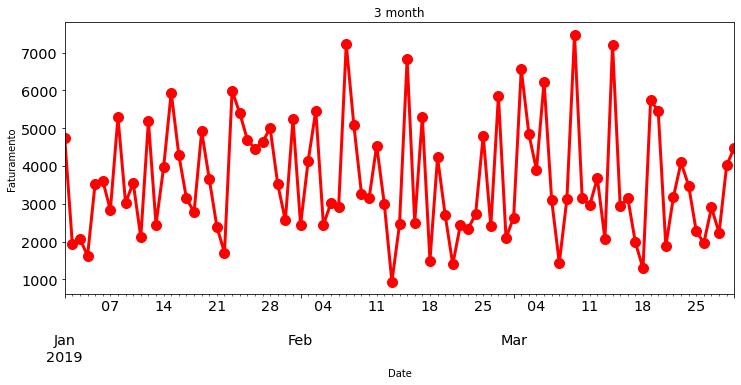

In [34]:

plt.figure(figsize=(12,5))
plt.title('3 month')
plt.ylabel('Faturamento')
df.groupby('Date')['Total'].sum().plot(kind='line', marker='o', color='red', ms=10, label="Expenses")
plt.show()

## <font color='red'> Quantidade dos produtos vendidos durante os 3 meses </font>

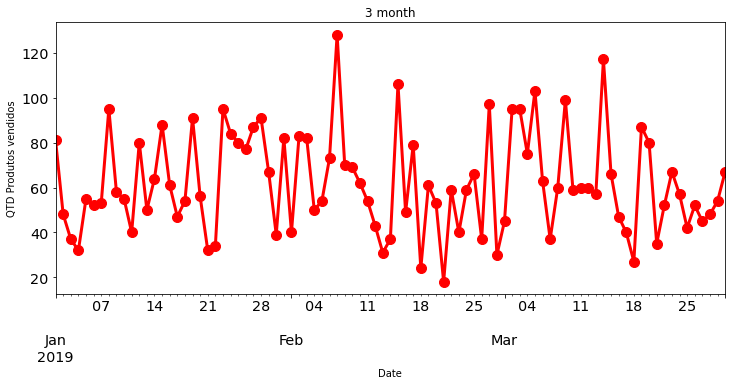

In [35]:

plt.figure(figsize=(12,5))
plt.title('3 month')
plt.ylabel('QTD Produtos vendidos')     
df.groupby('Date')['Quantity'].sum().plot(kind='line', marker='o', color='red', ms=10)
plt.show()

## <font color='orange'> Media diaria do Faturamento das Vendas durante os 3 meses </font>

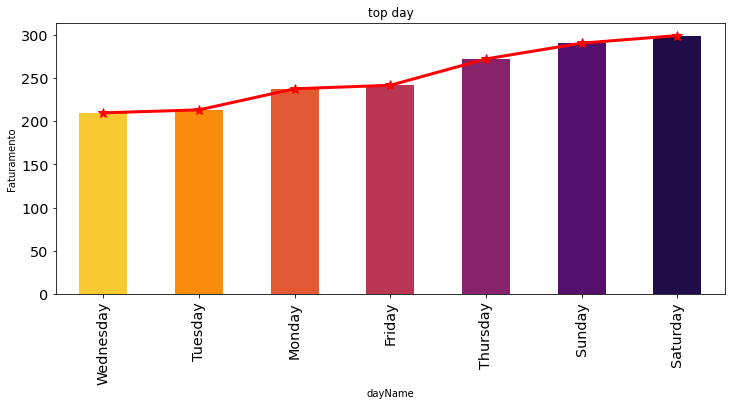

In [36]:
plt.figure(figsize=(12,5))
plt.title('top day')
plt.ylabel('Faturamento')
df.groupby('dayName')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('dayName')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='orange'> Media diaria da quantidade dos produtos vendidos durante os 3 meses </font>

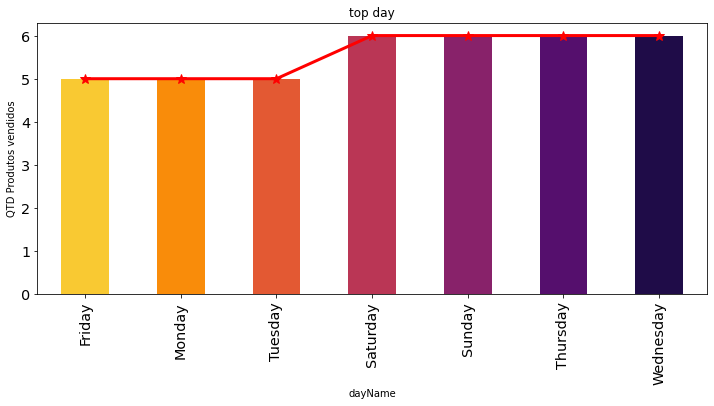

In [37]:
plt.figure(figsize=(12,5))
plt.title('top day')
plt.ylabel('QTD Produtos vendidos')
df.groupby('dayName')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('dayName')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='orange'> Media do Faturamento das Vendas em diferentes horas do dia durante os 3 meses </font>

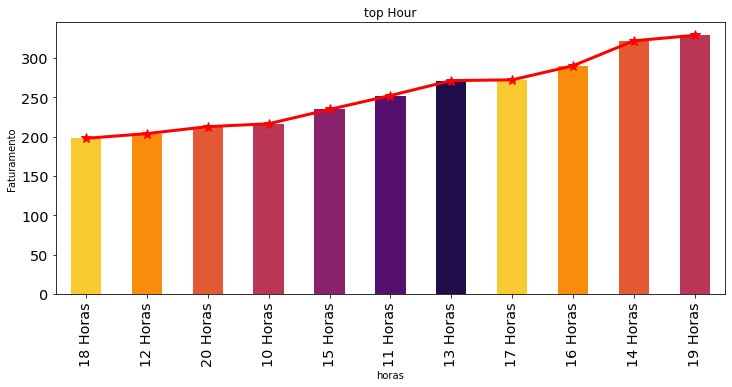

In [38]:
plt.figure(figsize=(12,5))
plt.title('top Hour')
plt.ylabel('Faturamento')
df.groupby('horas')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('horas')['Total'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='orange'> Media da quantidade dos produtos vendidos em diferentes horas do dia durante os 3 meses </font>

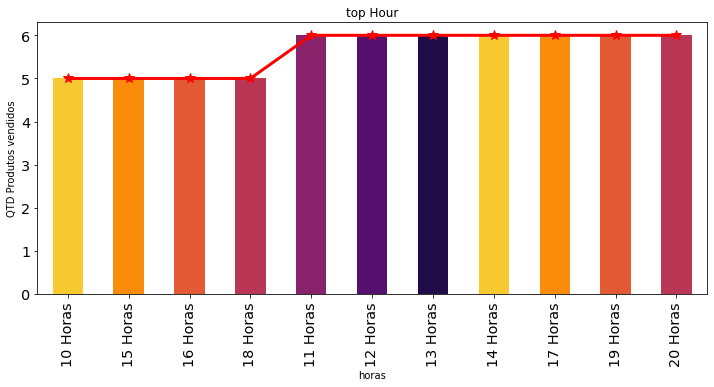

In [39]:
plt.figure(figsize=(12,5))
plt.title('top Hour')
plt.ylabel('QTD Produtos vendidos')
df.groupby('horas')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='line', marker='*', color='red', ms=10)
df.groupby('horas')['Quantity'].median().sort_values(ascending=True)[0:11].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

## <font color='red'> Faturamento das Vendas de acordo com o periodo do dia</font>

*  Neste ponto, vamos analizar como as variaveis *marca*, *cidade*, *tipo de consumidor*, *genero*, *linha do produto* e *metodo de pagamento* tem influenciado no *faturamento das vendas* de acordo com o *periodo* do dia.

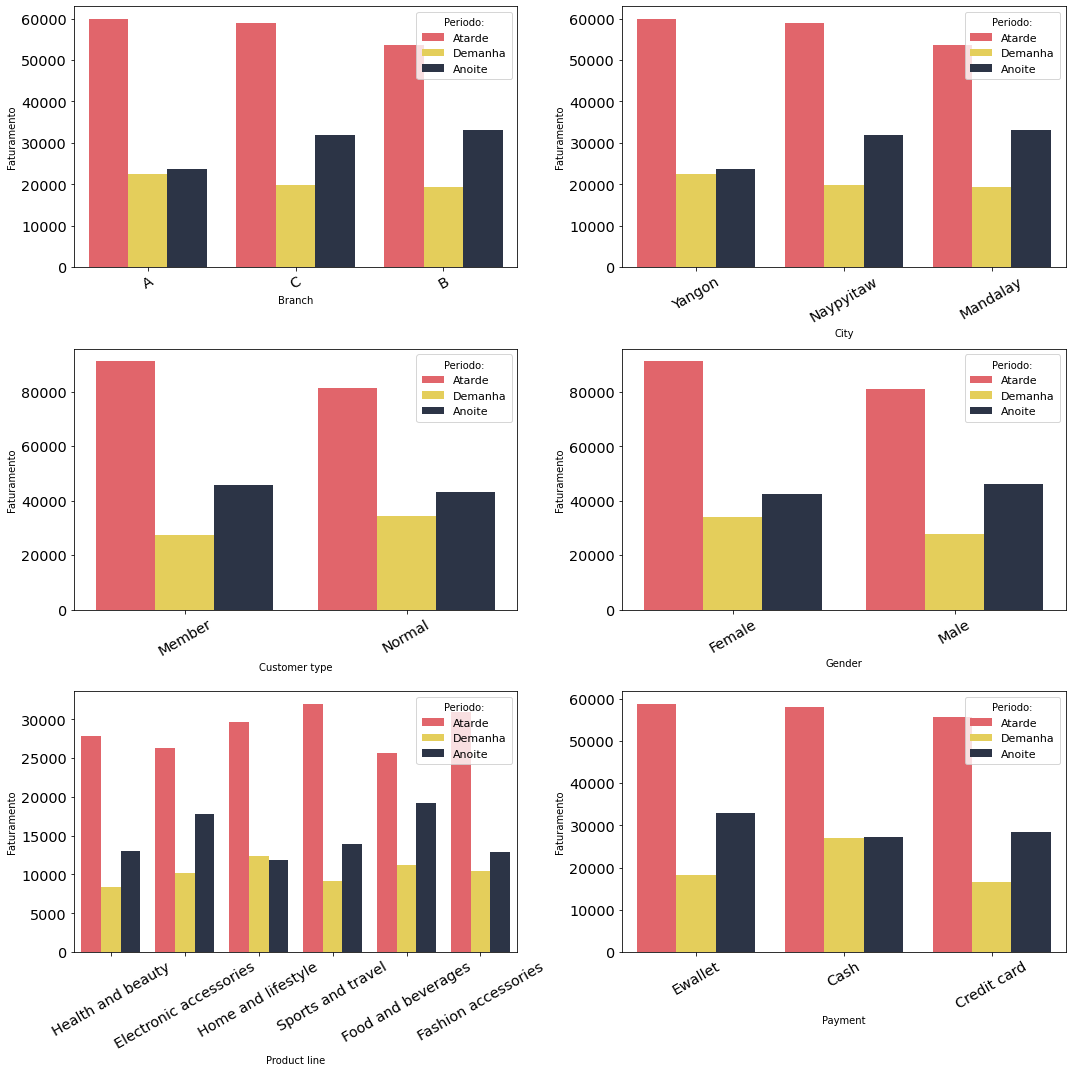

In [40]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Total', data=df, ci=None, estimator=sum, hue = 'Periodo', 
                palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.ylabel('Faturamento')
    plt.legend(loc = 'upper right', 
           borderpad = 0.5, 
           labelspacing = 0.5, 
           fontsize = 11, 
           title = 'Periodo:')

## <font color='red'> Quantidade dos produtos vendidos de acordo com o periodo do dia</font>

*  Neste ponto, vamos analizar como as variaveis *marca*, *cidade*, *tipo de consumidor*, *genero*, *linha do produto* e *metodo de pagamento* tem influenciado na *quantidade dos produtos vendidos* de acordo com o *periodo* do dia.

In [ ]:
plt.figure(figsize = (15, 15))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x= df[cats[i]], y='Total', data=df, ci=None, estimator=sum, hue = 'Periodo', 
                palette = ["#F65058FF","#FBDE44FF",'#28334AFF'])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.ylabel('Faturamento')
    plt.legend(loc = 'upper right', 
           borderpad = 0.5, 
           labelspacing = 0.5, 
           fontsize = 11, 
           title = 'Periodo:')